In [1]:
import numpy as np
from sklearn.datasets import make_circles
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

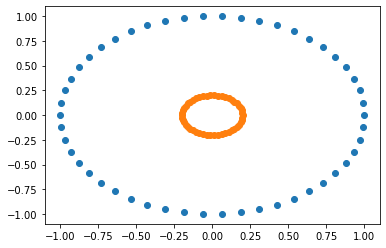

In [2]:
X, y = make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.2)
# factor : float, default=0.8
#    Scale factor between inner and outer circle in the range (0, 1).


for i in range(2):
    plt.scatter(X[y==i,0], X[y==i,1])
plt.show()


In [3]:
def kernel_kmeans(X, n_clusters, sigma=1, max_iter=100, n_init=10, tol=1e-7):
    '''Kernel k-Means Clustering
    Parameters
    ----------
    X : array, shape (n_data_points, n_features)
        The data array.
    n_clusters : int
        The number of clusters.
    sigma : float
        Parameter for the Gaussian Kernel.
        K(a,b) = np.exp(-(a-b)**2 / (2 * (sigma ** 2)))
    max_iter: int, default: 100
        The maximum number of iterations of the Kernel k-Means algorithm.
    n_init: int, default 10
        The number of runs of the Kernel k-Means algorithm.
        The results corresponding to the minimum cost will be returned.
    tol: float, default 1e-7
        Tolerance for convergence.
    Returns
    -------
    mincost_mem: array, shape (n_data_points)
        The resulting cluster memberships.
    min_cost: float
        The lowest cost achieved in n_init runs.
    '''

    K = np.exp(-cdist(X, X, metric='sqeuclidean') / (2 * (sigma ** 2)))
    K_diag = np.diag(K) # Diagonal gives K(x_i,x_i) for all i
    min_cost = +np.inf
    for _ in range(n_init):
        cost = +np.inf
        mem = np.random.randint(0, n_clusters, X.shape[0])
        for v_iter in range(max_iter):
            # Compute distances
            dist = np.zeros((X.shape[0], n_clusters))
            for j in range(n_clusters):
                if (mem == j).sum() > 0:
                    dist[:, j] = (
                        K_diag    # K(x_i,x_i) for all i
                        - (2 * K[:, mem == j].sum(axis=1) / (mem == j).sum())
                        + (K[:, mem == j][mem == j, :].sum()
                            / ((mem == j).sum() ** 2))
                    )
            # Update membership
            mem = dist.argmin(axis=1)
            # Check for convergence
            prev_cost = cost
            cost = dist[np.arange(X.shape[0]), mem].sum()
            if prev_cost - cost < tol:
                break
        if min_cost > cost:
            min_cost = cost
            mincost_mem = np.array(mem)
    return mincost_mem, min_cost

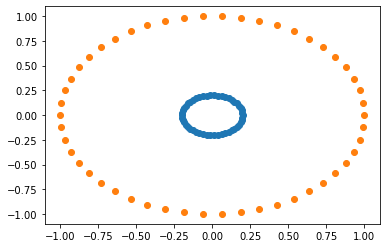

In [4]:
# With an appropriate sigma, the circles can be identified separately

k = 2
mem, cost = kernel_kmeans(X, n_clusters=k, sigma=0.3)

for i in range(2):
    plt.scatter(X[mem==i,0], X[mem==i,1])
plt.show()

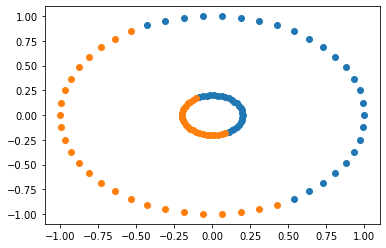

In [5]:
# High sigma leads to behaviour similar to Euclidean distance

k = 2
mem, cost = kernel_kmeans(X, n_clusters=k, sigma=4.2)

for i in range(2):
    plt.scatter(X[mem==i,0], X[mem==i,1])
plt.show()